In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃ 3️⃣  DEFINE UTILITY FUNCTIONS          ┃
# ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

def load_image(path: str) -> np.ndarray:
    """
    • Reads image bytes from ‘path’ into a NumPy array (BGR color).
    • Under the hood: cv2.imdecode converts raw bytes → image matrix.
    """
    data = np.fromfile(path, dtype=np.uint8)
    img  = cv2.imdecode(data, cv2.IMREAD_COLOR)
    return img

def display_image(img: np.ndarray, title="Image", cmap=None) -> None:
    """
    • Converts BGR → RGB, then plots with Matplotlib.
    • ‘cmap’ controls grayscale display when needed.
    """
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃ 4️⃣  PREPROCESSING & EDGE DETECTION     ┃
# ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

def to_grayscale(img: np.ndarray) -> np.ndarray:
    """Converts BGR image → single‑channel grayscale."""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img: np.ndarray, ksize=5) -> np.ndarray:
    """
    Applies Gaussian smoothing.
    • ksize must be odd (e.g. 5, 7, 9).
    • Blurs out noise so edges are cleaner.
    """
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def detect_edges(img_gray: np.ndarray, low=50, high=150) -> np.ndarray:
    """
    Canny edge detection:
      1. Finds intensity gradients.
      2. Applies hysteresis thresholding (low & high).
    """
    return cv2.Canny(img_gray, low, high)


In [ ]:
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃ 5️⃣  CONTOUR FINDING & DRAWING         ┃
# ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

def find_contours(edges: np.ndarray):
    """
    • cv2.findContours returns all continuous outlines.
    • RETR_EXTERNAL → only outermost shapes.
    """
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours(img: np.ndarray, contours, color=(0,255,0), thickness=2):
    """
    • Overlays each contour on the original image.
    """
    out = img.copy()
    cv2.drawContours(out, contours, -1, color, thickness)
    return out


In [ ]:
# ➤ Upload from your local machine

from google.colab import files

uploaded = files.upload()



Saving cat.jpg to cat.jpg


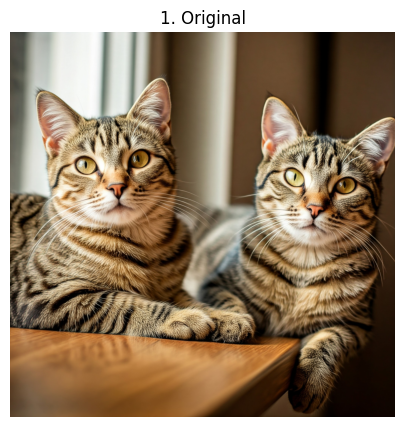

In [ ]:
img_path = next(iter(uploaded.keys()))

# ➤ Load & show original
img   = load_image(img_path)
display_image(img, "1. Original")

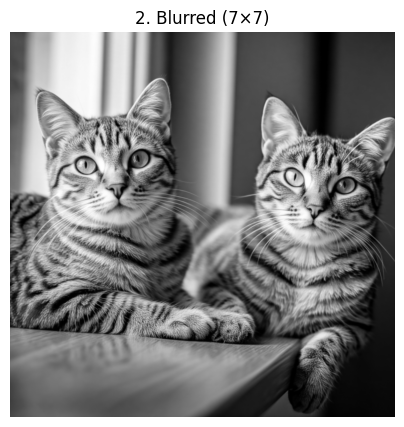

In [ ]:
# ➤ Preprocess: gray + blur
gray  = to_grayscale(img)
blur  = gaussian_blur(gray, ksize=7)
display_image(blur, "2. Blurred (7×7)", cmap='gray')

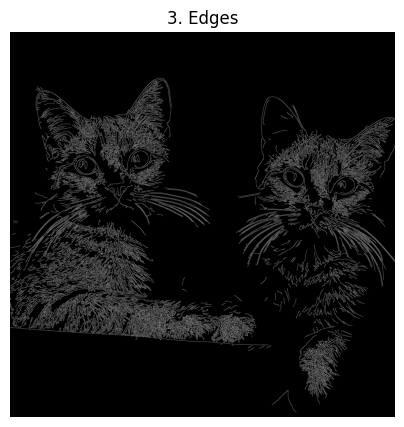

In [ ]:
# ➤ Edge detection
edges = detect_edges(blur, low=40, high=120)
display_image(edges, "3. Edges", cmap='gray')


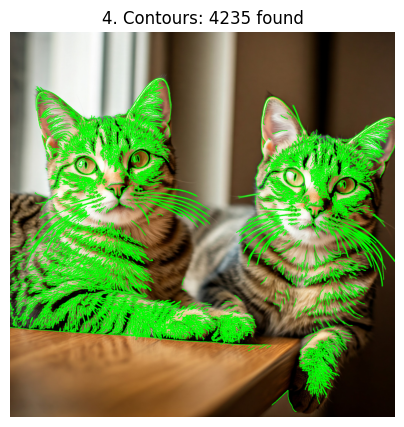

In [ ]:
# ➤ Contours
ctrs  = find_contours(edges)
out   = draw_contours(img, ctrs)
display_image(out, f"4. Contours: {len(ctrs)} found")